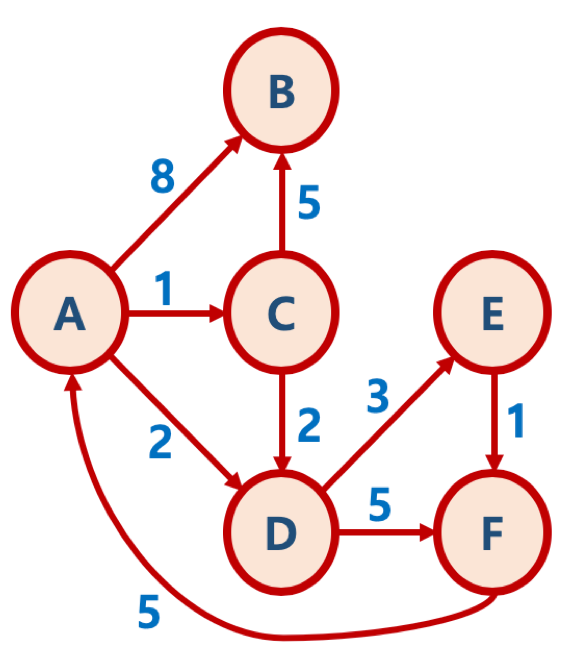

In [1]:
import heapq


# 탐색할 그래프와 시작 정점을 인수로 전달받습니다.
def dijkstra(graph, start, end):
    # 시작 정점에서 각 정점까지의 거리를 저장할 딕셔너리를 생성하고, 무한대(inf)로 초기화합니다.
    distances = {vertex: [float('inf'), start] for vertex in graph}

    # 그래프의 시작 정점의 거리는 0으로 초기화 해줌
    distances[start] = [0, start]

    # 모든 정점이 저장될 큐를 생성합니다.
    queue = []

    # 그래프의 시작 정점과 시작 정점의 거리(0)을 최소힙에 넣어줌
    heapq.heappush(queue, [distances[start][0], start])

    while queue:
        
        # 큐에서 정점을 하나씩 꺼내 인접한 정점들의 가중치를 모두 확인하여 업데이트합니다.
        current_distance, current_vertex = heapq.heappop(queue)
        
        # 더 짧은 경로가 있다면 무시한다.
        if distances[current_vertex][0] < current_distance:
            continue
            
        for adjacent, weight in graph[current_vertex].items():
            distance = current_distance + weight
            # 만약 시작 정점에서 인접 정점으로 바로 가는 것보다 현재 정점을 통해 가는 것이 더 가까울 경우에는
            if distance < distances[adjacent][0]:
                # 거리를 업데이트합니다.
                distances[adjacent] = [distance, current_vertex]
                heapq.heappush(queue, [distance, adjacent])
    
    path = end
    path_output = end + '->'
    while distances[path][1] != start:
        path_output += distances[path][1] + '->'
        path = distances[path][1]
    path_output += start
    print (path_output)
    return distances

# 방향 그래프
mygraph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}

print(dijkstra(mygraph, 'A', 'F'))

F->E->D->A
{'A': [0, 'A'], 'B': [6, 'C'], 'C': [1, 'A'], 'D': [2, 'A'], 'E': [5, 'D'], 'F': [6, 'E']}


In [2]:
mygraph = {
    'A': {'B': 8, 'C': 1, 'D': 2},
    'B': {},
    'C': {'B': 5, 'D': 2},
    'D': {'E': 3, 'F': 5},
    'E': {'F': 1},
    'F': {'A': 5}
}

In [3]:
### (알고리즘 구현 방법) ###









In [4]:
# import heapq # 히프큐  불러오기

# def dijkstra(start,end):     # 함수 정의 
# start = 
# end=






# a=str(input("시작점을 입력하세요: "))
# b=str(input(" 종점을 입력하세요: "))
# print()

In [27]:
#최단경로 알고리즘
#reference : http://navercast.naver.com/contents.nhn?rid=2871&amp;contents_id=85293
import copy

#목적지와 도착지를 설정해준다
a= str(input("출발지를 입력하세요 : "))
b=str(input("도착지를 입력하세요 : "))

departure = a
destination = b
print ("-----------[", departure, "->", destination,"]----------")


#① 지도상의 모든 건물들과 집에서 각 건물들까지의 최단 거리를 나타내는 표를 만든다.

landscape = {
    '집':             {'미용실':5, '슈퍼마켓':10, '학원':9},
    '미용실' :        {'집':5 ,'슈퍼마켓':3, '은행':11},
    '슈퍼마켓' :     {'미용실':3, '집':10, '학원':7, '음식점':3},
    '학원':   {'집':9, '슈퍼마켓':7, '학교':12},
    '음식점' :      {'슈퍼마켓':3, '은행':4},
    '은행' :            {'미용실':11, '음식점':4, '학원':7, '학교':2},
    '학교' :          {'은행':2, '학원':12}
    }

routing = {}
for place in landscape.keys():
    routing[place]={'shortestDist':0, 'route':[], 'visited':0}

#④

def visitPlace(visit):
    routing[visit]['visited'] = 1
    for toGo, betweenDist in landscape[visit].items():
        toDist = routing[visit]['shortestDist'] + betweenDist
        if (routing[toGo]['shortestDist'] >= toDist) or  not routing[toGo]['route']:
            routing[toGo]['shortestDist'] = toDist
            routing[toGo]['route'] = copy.deepcopy(routing[visit]['route'])
            routing[toGo]['route'].append(visit)
            

#② 집과 직접 길로 이어진 건물들까지의 최단 거리는 지도에 표시된 값으로 적고 그렇지 않은 건물들은 빈 칸으로 놓아둔다. 여기서 빈 칸의 값은 무한대를 뜻한다.
            
visitPlace(departure)

# """
# ③ 거리가 가장 짧은 건물부터 긴 건물 순으로 방문하고 방문한 건물은 색깔로 칠해 구별한다. 이때 방문한 경로도 색칠한다. 
# ④ 새로운 건물을 방문하면 그 건물과 이어진 건물들까지의 거리를 새로 바꾼다. 단, 이전에 이미 최단 거리가 구해졌었다면 거리를 서로 비교해 작은 것으로 바꾸거나 유지한다.
# ⑤ 그래프의 모든 건물들을 방문할 때까지 ③,④의 과정을 반복한다.
# """
while 1 :
    #③
    minDist = max(routing.values(), key=lambda x:x['shortestDist'])['shortestDist']
    toVisit = ''
    for name, search in routing.items():
        if 0 < search['shortestDist'] <= minDist and not search['visited']:
            minDist = search['shortestDist']
            toVisit = name
    #⑤
    if toVisit == '':
        break
    #④
    visitPlace(toVisit)

    print ("["+toVisit+"]")
    print ("Dist :", minDist)

print("\n", "[", departure, "->", destination,"]")
print ("Route : ", routing[destination]['route'])
print ("ShortestDistance : ", routing[destination]['shortestDist'])


출발지를 입력하세요 : 집
도착지를 입력하세요 : 학원
-----------[ 집 -> 학원 ]----------
[미용실]
Dist : 5
[슈퍼마켓]
Dist : 8
[학원]
Dist : 9
[음식점]
Dist : 11
[은행]
Dist : 15
[학교]
Dist : 17

 [ 집 -> 학원 ]
Route :  ['집']
ShortestDistance :  9
